In [111]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [112]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
# 가장 많이 나온 10000개 단어만 인코딩하여 학습

In [113]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [114]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [115]:
train_labels[0:10] # 0 : negative, 1 : positive

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [116]:
# for td in train_data:
#     print(len(td), sep = ', ')

## 긍정리뷰 / 부정리뷰 분류
- 토큰화 : 공백을 기준으로 단어를 분리
- 긍정적인 단어, 부정적인 단어가 많이 포함된 것을 파악하여 학습 ex)긍정적인 단어가 많으면 긍정리뷰라고 판단
- 학습시 숫자만 사용가능 but 리뷰는 문자로 되어있으므로 정수 인코딩 작업 필요
- 1. 토큰화
  2. unique화(중복되는 단어는 하나의 정수로 인코딩하기 위해)
  3. 단어별 카운트 -> descending sort -> 빈도수가 가장 많은 것이 정수 인코딩 1, 그다음으로 빈도수가 많은 것이 2의 값을 가짐
  4. 단어를 정수 인코딩 값으로 치환

In [117]:
word_index = imdb.get_word_index()

In [118]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [119]:
len(word_index)

88584

In [120]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [121]:
# word_index = {k : (v + 3) for k, v in word_index.items()}

In [122]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [123]:
# word_index["<PAD>"] = 0
# word_index["<START>"] = 1
# word_index["<UNK>"] = 2
# word_index["<UNUSED>"] = 3

In [124]:
# word_index_sort = sorted(word_index.items(),key= lambda x:x[1])

In [125]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [126]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
# 인덱스값을 통해 get으로 단어를 받아오고, 만약 없는 단어라면 '?'로 내용을 대체하겠다.

In [127]:
decode_review(train_data[1])

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

In [87]:
# padding 파라미터 : 'post'로 설정하면 시퀀스의 뒤에 value로 설정한 패딩값이 붙는다. 디폴트는 'pre'
# maxlen 파라미터 : 시퀀스의 최대 길이를 제한함.
# value 파라미터 : word_index["<PAD>"] -> 0
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value = word_index["<PAD>"],
                                                       padding = 'post',
                                                       maxlen = 256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value = word_index["<PAD>"],
                                                       padding = 'post',
                                                       maxlen = 256)

In [88]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [91]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape = (None, ))) # 차원축소 like PCA
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [96]:
x_valid = train_data[:10000]
partial_x_train = train_data[10000:] # 15000개

y_valid = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [97]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 40,
                   batch_size = 512,
                   validation_data = (x_valid, y_valid),
                   verbose = 1)

Epoch 1/40


30/30 [==============================] - 5s 59ms/step - loss: 0.6923 - accuracy: 0.5733 - val_loss: 0.6910 - val_accuracy: 0.7145
Epoch 2/40
30/30 [==============================] - 1s 31ms/step - loss: 0.6887 - accuracy: 0.7325 - val_loss: 0.6860 - val_accuracy: 0.7333
Epoch 3/40
30/30 [==============================] - 1s 34ms/step - loss: 0.6805 - accuracy: 0.7431 - val_loss: 0.6746 - val_accuracy: 0.7493
Epoch 4/40
30/30 [==============================] - 1s 32ms/step - loss: 0.6625 - accuracy: 0.7619 - val_loss: 0.6523 - val_accuracy: 0.7614
Epoch 5/40
30/30 [==============================] - 1s 33ms/step - loss: 0.6318 - accuracy: 0.7837 - val_loss: 0.6185 - val_accuracy: 0.7737
Epoch 6/40
30/30 [==============================] - 1s 33ms/step - loss: 0.5903 - accuracy: 0.8026 - val_loss: 0.5766 - val_accuracy: 0.7938
Epoch 7/40
30/30 [==============================] - 1s 47ms/step - loss: 0.5421 - accuracy: 0.8220 - val_loss: 0.5319 - val_accuracy: 0.8105
Epoch 8/40


In [98]:
results = model.evaluate(test_data, test_labels, verbose = 2)
print("loss = ", results[0])
print("accuracy = ", results[1])

782/782 - 3s - loss: 0.3324 - accuracy: 0.8730 - 3s/epoch - 4ms/step
loss =  0.3323584794998169
accuracy =  0.8730000257492065


In [99]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict['loss']

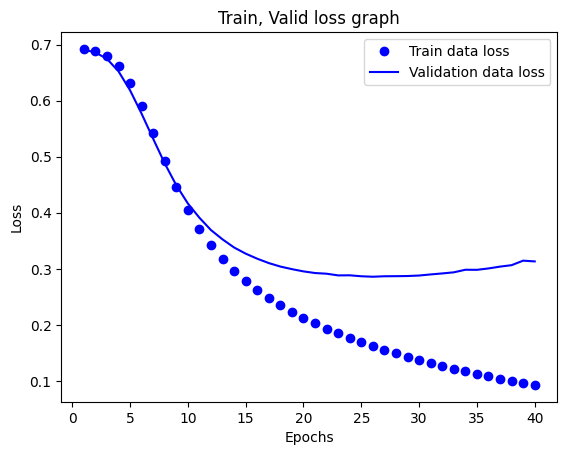

In [101]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = "Train data loss")
plt.plot(epochs, val_loss, 'b', label = "Validation data loss")
plt.title("Train, Valid loss graph")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

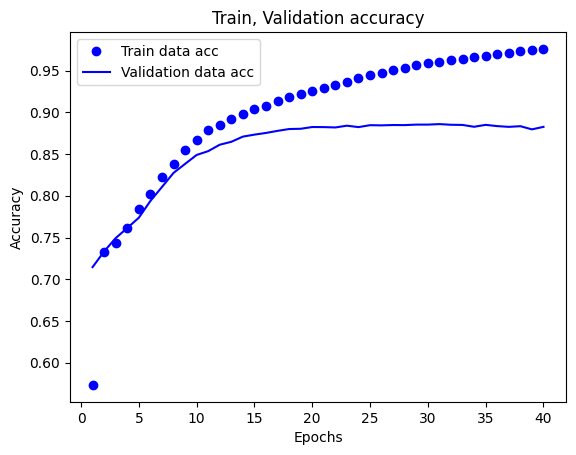

In [102]:
plt.clf()

plt.plot(epochs, acc, 'bo', label = "Train data acc")
plt.plot(epochs, val_acc, 'b', label = "Validation data acc")
plt.title("Train, Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()